
# **MAIN FILE**

---



# **ISOLATION FOREST MODEL**

This code demonstrates the implementation of an Isolation Forest model for fraud detection using scikit-learn in Python.


**Install Required Libraries:**
First, install the required libraries. If you haven't installed them yet, use the following commands:

In [ ]:
!pip install pandas scikit-learn


**Import Libraries:**
Import the necessary libraries and modules:

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest


**Load Data:**
Load your datasets (fraudTrain.csv and fraudTest.csv) into Pandas DataFrames:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/My Drive/fraudTest.csv')


**Prepare Data:**
Depending on the structure of your data, you might need to preprocess it. Ensure that you have a numerical representation of the features. For simplicity, you can drop non-numeric columns and handle missing values:

In [ ]:
train_data = train_data.select_dtypes(include=['number']).dropna()
test_data = test_data.select_dtypes(include=['number']).dropna()


**Train the Isolation Forest Model:**
Train the model using the training data:The contamination parameter is used to set the proportion of outliers in the dataset. Adjust it based on your understanding of the fraud rate in your data.

In [ ]:
model = IsolationForest(contamination=0.01)  # Adjust contamination based on your dataset
model.fit(train_data.drop('is_fraud', axis=1))  # Assuming 'is_fraud' is your target column


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

**Predict Fraud on Test Data:**
Use the trained model to predict fraud on the test data:The fraud_prediction column will contain -1 for outliers (potentially fraud) and 1 for inliers.

In [ ]:
test_data['fraud_prediction'] = model.predict(test_data.drop('is_fraud', axis=1))


**Evaluate Model Performance:**
Depending on your dataset, you might need to evaluate the model's performance using metrics such as precision, recall, or F1-score. This is especially important since fraud detection usually involves imbalanced datasets.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_data['is_fraud'], test_data['fraud_prediction']))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    553574
           1       0.00      0.82      0.01      2145

    accuracy                           0.00    555719
   macro avg       0.00      0.27      0.00    555719
weighted avg       0.00      0.00      0.00    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adjust the threshold for classifying a transaction as fraud based on your evaluation.

Remember to customize these steps based on the specifics of your dataset. The above code assumes that your dataset has a column named 'is_fraud' that indicates whether a transaction is fraudulent. Adjust the column names and preprocessing steps as needed.

Precision, Recall & F1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
precision = precision_score(test_flags, predicted_anomalies)

# Calculate Recall
recall = recall_score(test_flags, predicted_anomalies)

# Calculate F1-score
f1 = f1_score(test_flags, predicted_anomalies)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.0038598644278853163
Recall: 1.0
F1-score: 0.007690046319533076


## **K-MEANS CLUSTERING**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

 Assuming 'fraud' column indicates anomalies (1 for fraud, 0 for non-fraud)

In [ ]:
train_flags = train_data ['is_fraud']
test_flags = test_data['is_fraud']

KeyError: ignored

Remove the 'fraud' column from the data as it's the target variable

In [ ]:
train_data = train_data.drop(columns=['is_fraud'])
test_data = test_data.drop(columns=['is_fraud'])

KeyError: ignored

Ensure columns in train and test datasets are aligned

In [ ]:
common_columns = train_data.columns.intersection(test_data.columns)
test_data = test_data[common_columns]  # Keep only common columns in the test dataset

Assuming 'data' contains your dataset and 'flags' is the column indicating anomalies (1) and normal transactions (0)
Fit K-means clustering model on the train data


In [ ]:
n_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### Predict clusters for the test data

In [ ]:
test_clusters = kmeans.predict(test_data)

### Calculate the distance from each point in test data to its nearest cluster center

In [ ]:
test_distances = kmeans.transform(test_data)

### Set a threshold for anomaly detection (based on train data or experimentation)


In [ ]:
threshold = 100  # Adjust this value based on your train data analysis

### Find anomalies in the test data based on distance and threshold


### Predicted anomalies


In [ ]:
predicted_anomalies = np.where(np.max(test_distances, axis=1) > threshold, 1, 0)

### Compare predicted anomalies with actual flags to evaluate performance


In [ ]:
accuracy = np.mean(predicted_anomalies == test_flags)  # Accuracy of anomaly detection

print("Accuracy of anomaly detection:", accuracy)


### **Exploratory Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})
df= train_data
df.isna().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Remove Deuplicates

In [ ]:
df.drop_duplicates(inplace=True)

Transaction amount vs Fraud

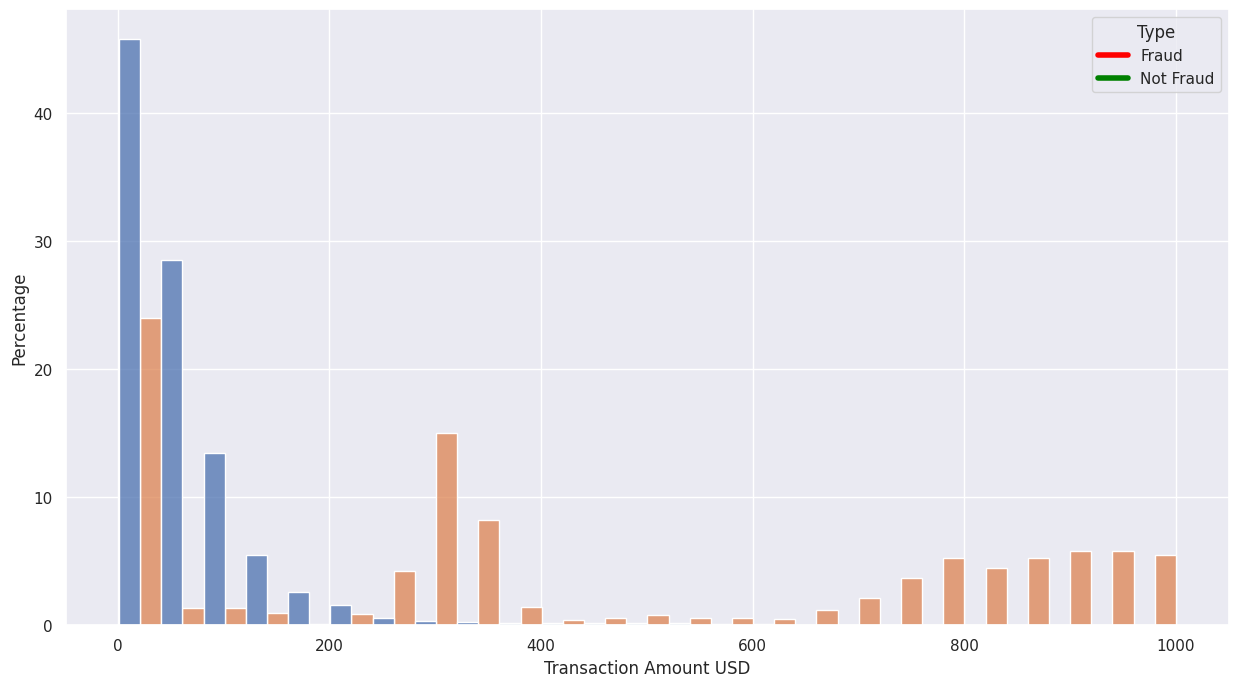

In [ ]:
df['amt'].describe()
np.percentile(df['amt'],99)
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage')
ax.set_xlabel('Transaction Amount USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Gender vs Fraud

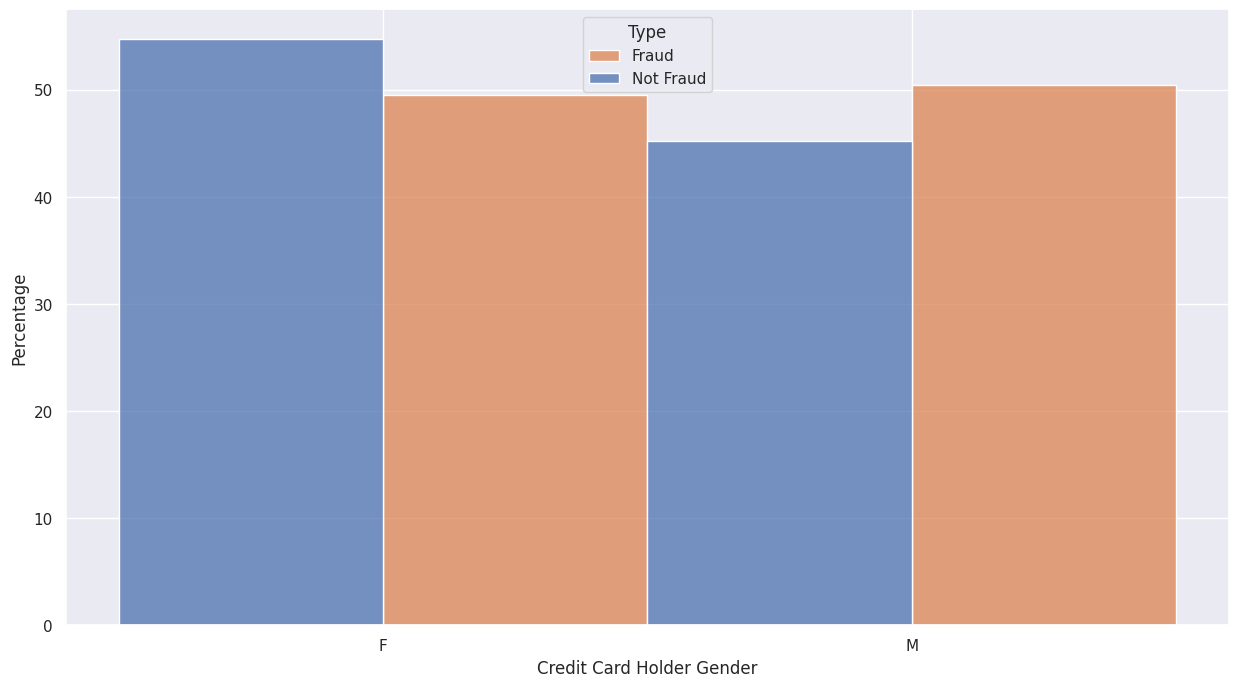

In [ ]:
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

 Spending Category vs Fraud

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

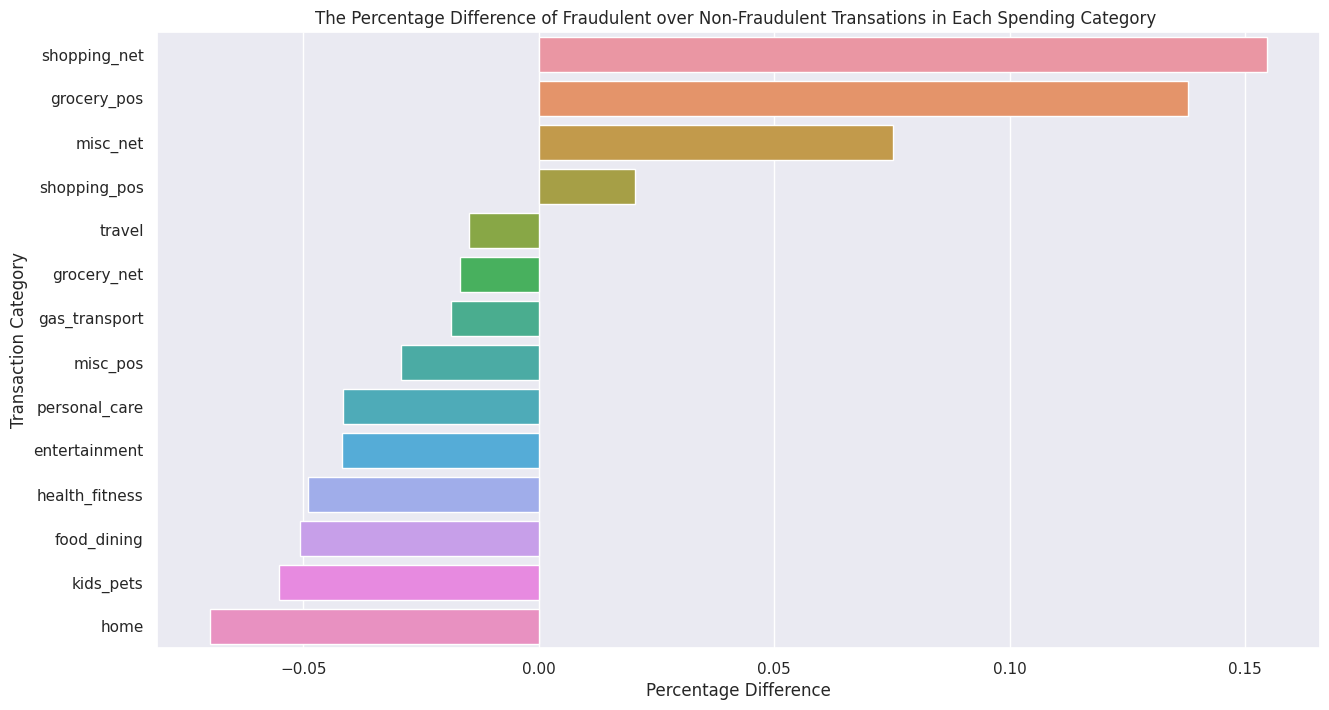

In [ ]:
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Age vs Fraud

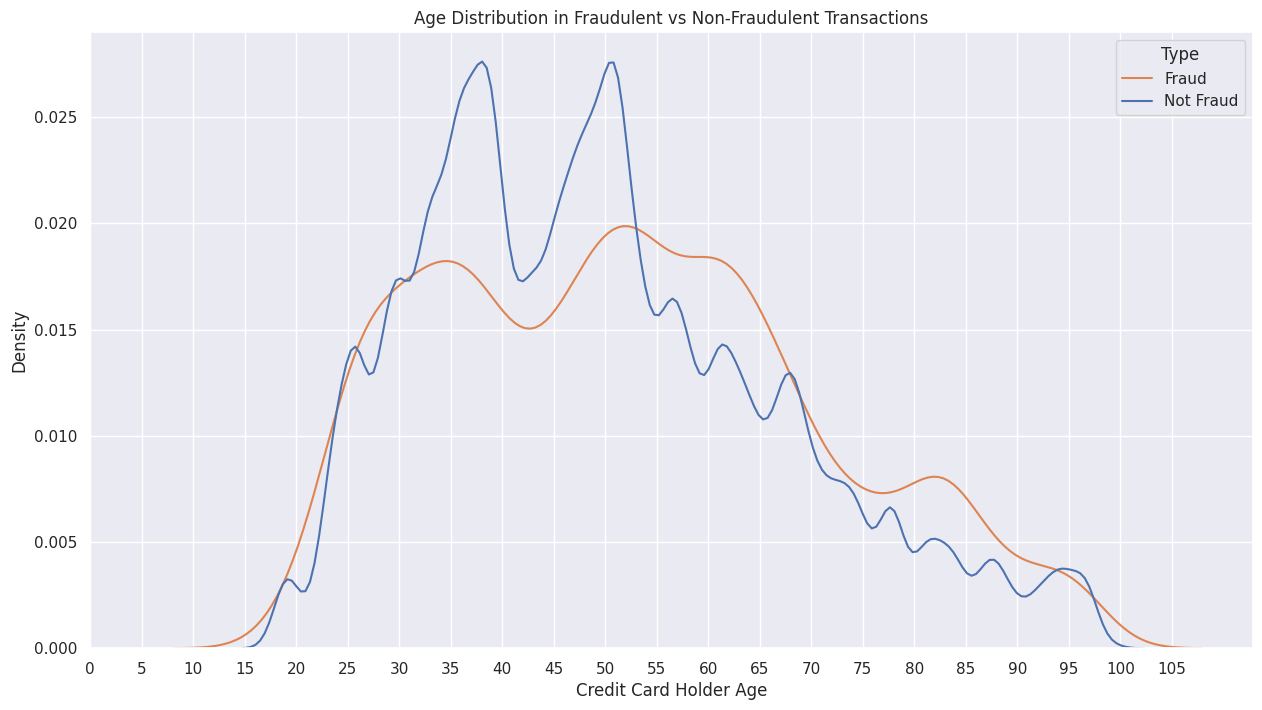

In [ ]:
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

State VS Fraud

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

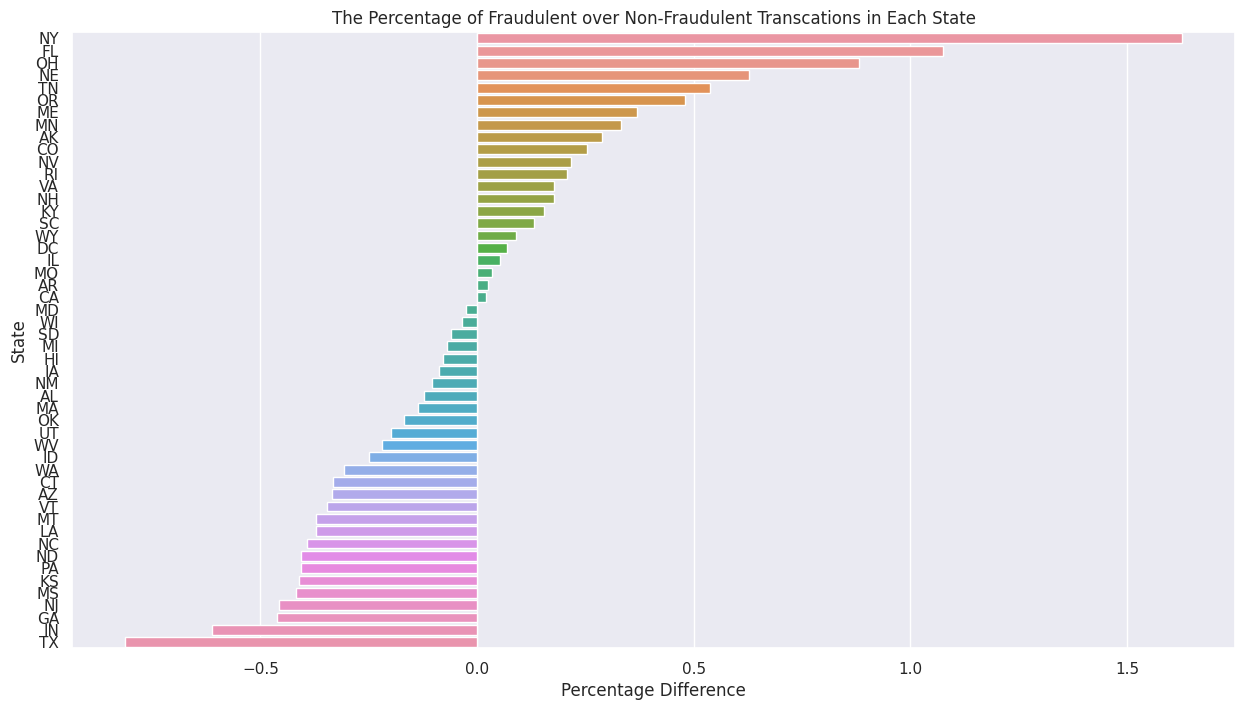

In [ ]:

a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage Fraud VS Non Fraud Each State')

#**One Class SVM**


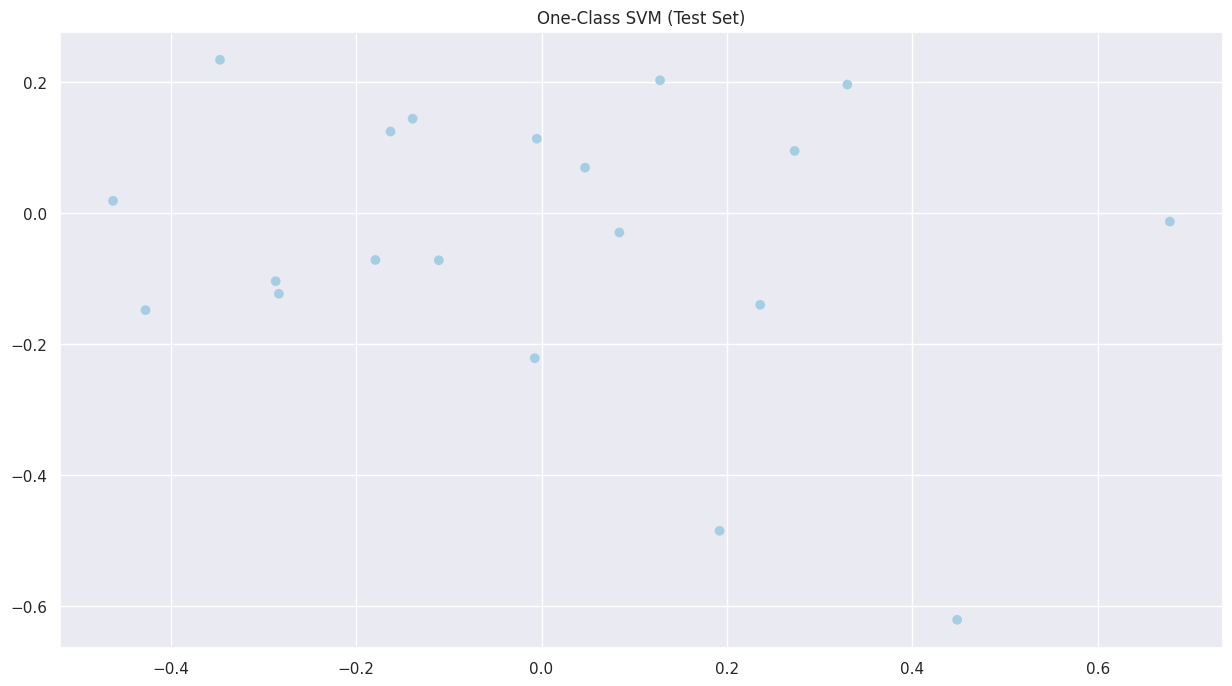

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
[[20]]


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# Generate sample data (you should replace this with your own data)
np.random.seed(0)
X = 0.3 * np.random.randn(100, 2)
train_data = np.r_[X + 2, X - 2]  # Corrected variable name
test_data = 0.3 * np.random.randn(20, 2)  # Corrected variable name

# Create and train the One-Class SVM model on the training data
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_data)

# Predict whether data points in the test set are inliers or outliers
y_pred_test = clf.predict(test_data)  # Corrected variable name

# Plot the results for the test set
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_pred_test, cmap=plt.cm.Paired)  # Corrected variable name
plt.title("One-Class SVM (Test Set)")
plt.show()

# Evaluate the model's performance on the test set
print("Classification Report:")
print(classification_report(np.ones(len(test_data)), (y_pred_test == -1).astype(int)))  # Corrected variable name
print("\nConfusion Matrix:")
print(confusion_matrix(np.ones(len(test_data)), (y_pred_test == -1).astype(int)))  # Corrected variable name



In [ ]:
import pandas as pd
import numpy as np

# Assuming train_data is a pandas DataFrame
train_data = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})

# Convert train_data to a NumPy array
train_data_array = train_data.to_numpy()

# Then, you can use train_data_array in clf.fit(train_data_array)



# **Local Outlier Factor (LOF)**

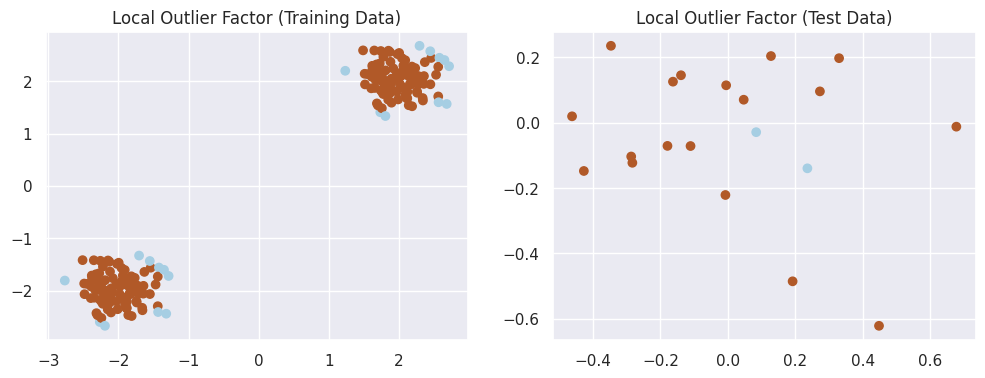

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate sample data (you should replace this with your own data)
np.random.seed(0)
X = 0.3 * np.random.randn(100, 2)
train_data = np.r_[X + 2, X - 2]  # Generate training data
test_data = 0.3 * np.random.randn(20, 2)  # Generate test data

# Create and fit the LOF model to the training data
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
y_pred_train = clf.fit_predict(train_data)

# Predict whether data points in the test set are inliers or outliers
y_pred_test = clf.fit_predict(test_data)

# Plot the results for the training data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(train_data[:, 0], train_data[:, 1], c=y_pred_train, cmap=plt.cm.Paired)
plt.title("Local Outlier Factor (Training Data)")

# Plot the results for the test data
plt.subplot(122)
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_pred_test, cmap=plt.cm.Paired)
plt.title("Local Outlier Factor (Test Data)")

plt.show()
